Imports

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

File Read

In [19]:
data = pd.read_csv('worldcup.csv')
data.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64


Info About Data

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           22 non-null     int64 
 1   Host           22 non-null     object
 2   Teams          22 non-null     int64 
 3   Champion       22 non-null     object
 4   Runner-Up      22 non-null     object
 5   TopScorer      22 non-null     object
 6   Attendance     22 non-null     int64 
 7   AttendanceAvg  22 non-null     int64 
 8   Matches        22 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 1.7+ KB


Descriptive Data

In [21]:
data.describe()

,Year,Teams,Attendance,AttendanceAvg,Matches
count,22.000000,22.000000,2.200000e+01,22.000000,22.000000
mean,1978.909091,22.363636,2.002201e+06,42728.545455,43.818182
std,27.738419,7.454915,1.101740e+06,12136.930791,17.632860
min,1930.000000,13.000000,3.630000e+05,20872.000000,17.000000
25%,1959.000000,16.000000,9.311905e+05,34749.000000,32.000000
50%,1980.000000,20.000000,1.987738e+06,46705.000000,45.000000
75%,2001.000000,32.000000,2.999695e+06,49527.250000,64.000000
max,2022.000000,32.000000,3.587538e+06,68991.000000,64.000000


Check For Missing Values

In [22]:
#check missing values
data.isnull().sum()

Year             0
Host             0
Teams            0
Champion         0
Runner-Up        0
TopScorer        0
Attendance       0
AttendanceAvg    0
Matches          0
dtype: int64

In [23]:

#check duplicates
data.duplicated().sum()

np.int64(0)

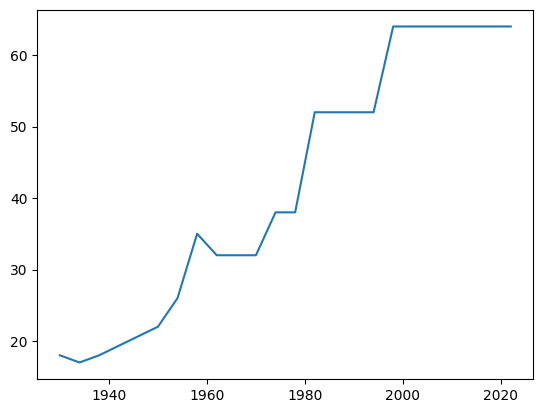

In [36]:
#Distribution of world cup matches over the years
plt.plot(data['Year'],data['Matches'])

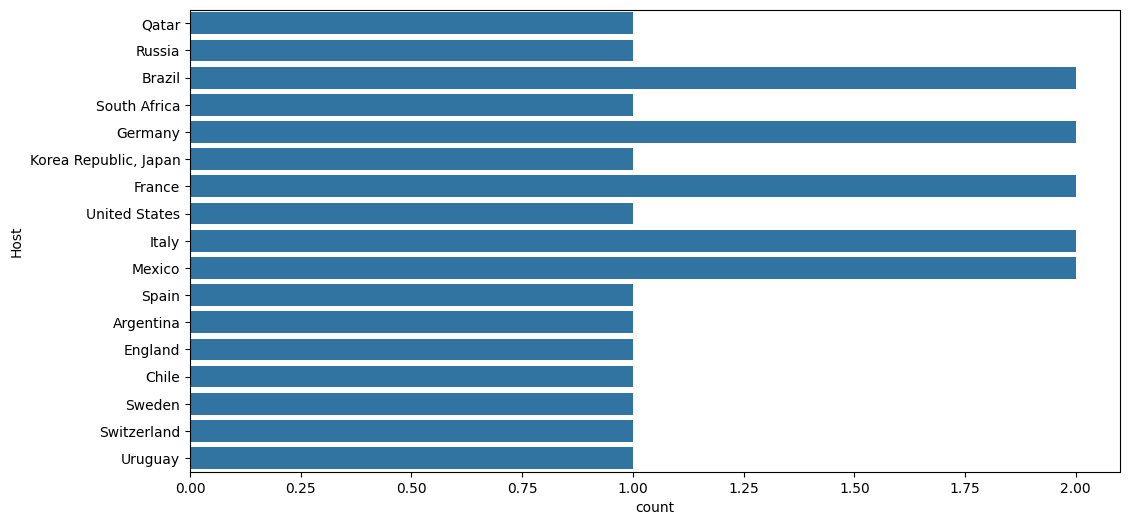

In [25]:
#host country analysis
plt.figure(figsize=(12,6))
sns.countplot(data['Host'])
plt.show()

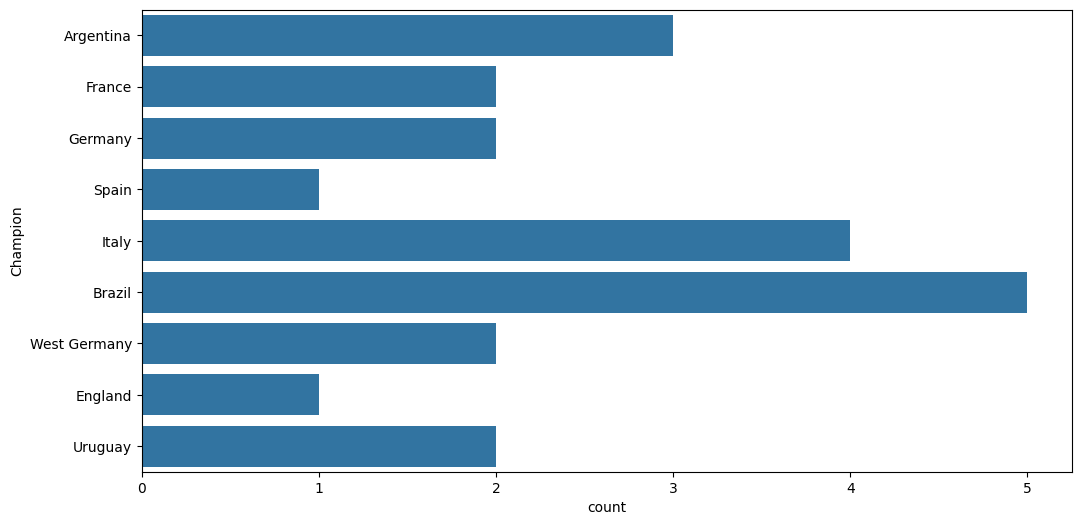

In [26]:
#champions analysis
plt.figure(figsize=(12,6))
sns.countplot(data['Champion'])
plt.show()

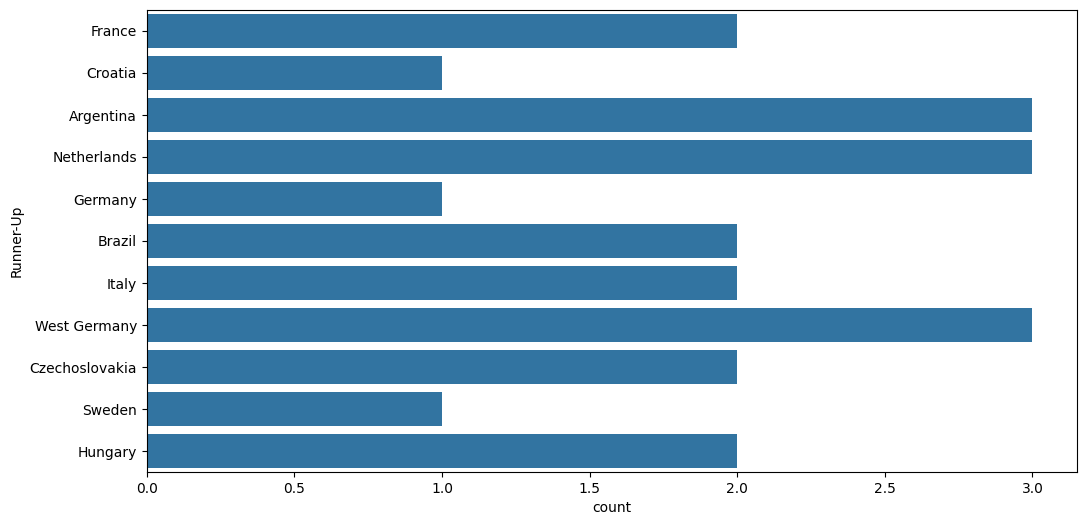

In [27]:
#runner up analysis
plt.figure(figsize=(12,6))
sns.countplot(data['Runner-Up'])
plt.show()

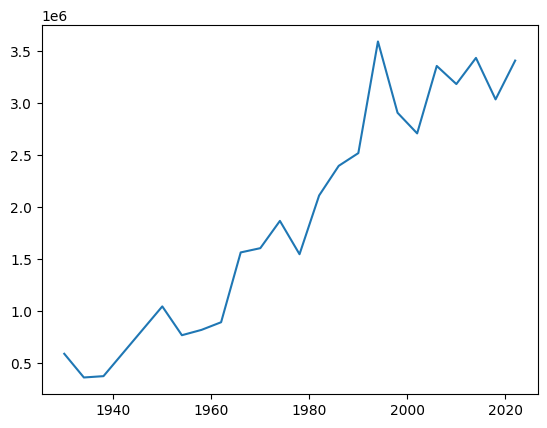

In [28]:
#total attendance over the years
plt.plot(data['Year'],data['Attendance'])
plt.show()

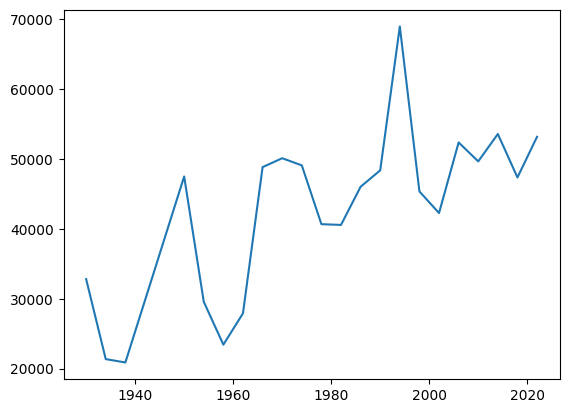

In [29]:
#avg attendance over the years
plt.plot(data['Year'],data['AttendanceAvg'])
plt.show()

In [30]:
#split for ease
# Ensure 'TopScorer' column exists and split it into 'TopScorerName' and 'TopScorerGoals'
if 'TopScorer' in data.columns:
	data['TopScorerName'] = data['TopScorer'].apply(lambda x: x.split(' - ')[0] if pd.notnull(x) else None)
	data['TopScorerGoals'] = data['TopScorer'].apply(lambda x: int(x.split(' - ')[1]) if pd.notnull(x) else None)
	
	# Sort the data by 'TopScorerGoals' in descending order
	sorted_data = data.sort_values(by='TopScorerGoals', ascending=False, na_position='last')
	
	# Display the top 5 rows of 'TopScorerName' and 'TopScorerGoals'
	sorted_data[['TopScorerName', 'TopScorerGoals']].head()
else:
	print("Column 'TopScorer' does not exist in the data.")
 
sorted_data.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorer,Attendance,AttendanceAvg,Matches,TopScorerName,TopScorerGoals
16,1958,Sweden,16,Brazil,Sweden,Just Fontaine - 13,819810,23423,35,Just Fontaine,13
17,1954,Switzerland,16,Germany,Hungary,Sándor Kocsis - 11,768607,29562,26,Sándor Kocsis,11
13,1970,Mexico,16,Brazil,Italy,Gerd Müller - 10,1603975,50124,32,Gerd Müller,10
14,1966,England,16,England,West Germany,Eusébio - 9,1563135,48848,32,Eusébio,9
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64,Kylian Mbappé,8


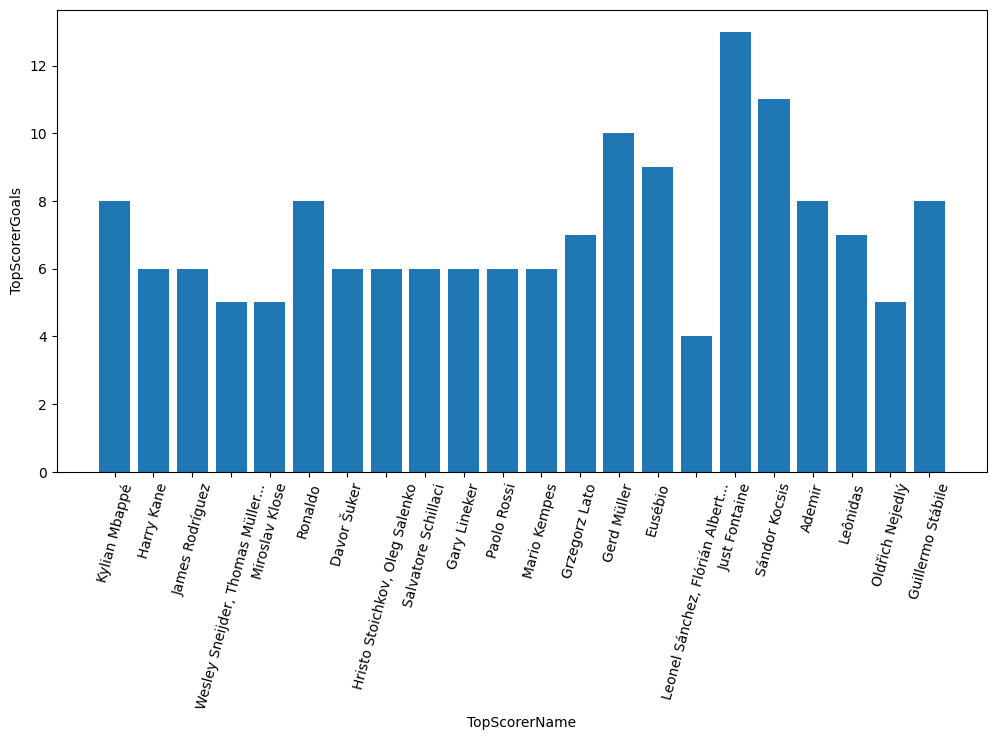

In [31]:
#plot TopScorerGoals and TopScorerNames
plt.figure(figsize=(12,6))
plt.bar(data['TopScorerName'],data['TopScorerGoals'])
plt.xlabel('TopScorerName')
plt.ylabel('TopScorerGoals')
plt.xticks(rotation=75)
plt.show()


In the conclusion section, summarize the key findings of your EDA:
• Which country hosted the World Cup the most?
• How has the total attendance changed over the years?
• Which country has won the most World Cups?
• Who are the top scorers, and how often did they achieve this title?

**Conclusion**
The world cup was hosted by Brazil, Germany, France, Italy and Mexico most

Over the years the total attendance increased until it reached a peak around the 1990s after that there was a drop during the time of the Great Depression (Late 2000s). After this, there was an increase in attendance and it has remained stable since.

Most world cups have been won by Brazil

Top Scorers are Just Fontaine(13), Sandor Kocsis(11), Gerd Muller(10), Eusebio(9), and Kylian Mbappe(8)